<a href="https://colab.research.google.com/github/carvalheirafc/deep_learning_stuff/blob/master/diabetes/statistical_analysis/diabetes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Data Analysis - Diabetes Dataset

### Tasks:

- Ler propriamente o arquivo no formato xlxs.

- Remover columunas e linhas desnecessárias, aka nAn ou entradas vazias.

- Como será feita uma análise estatistica dos valores de cada coluna, é necessario que se faça um tratamento como a normalização de seus valores para um intervalo comum.

- Primeira parte será verificar a **variancia** de cada coluna, isso é verificar o quanto os valores estão longe ou perto da média da população.
  Isso é de extrema importancia pois quero filtrar os valores que apenas são relevantes para o modelo, ou seja valores que variem para que assim em um futuro treino em uma rede neural estes sejam de maior importância do que valores mais constantes.
  
- Em seguida verificar a **correlação** das colunas normalizadas, isso deve-se ser feito para ver valores que são os mais distintos, idealmente usados em modelos não lineares ou valores que possuem uma correlação mais agregadas mais comumente usados em modelos lineares.


In [0]:
# Import Cell 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [24]:
#Reading and inspecting all features of the dataframe
diabetes = pd.read_excel('diabetes_Ex1.xlsx')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
A              768 non-null float64
B              768 non-null float64
C              774 non-null object
D              768 non-null float64
E              768 non-null float64
F              768 non-null float64
G              768 non-null float64
H              768 non-null float64
I              768 non-null float64
J              768 non-null float64
K              768 non-null float64
L              768 non-null float64
M              768 non-null float64
N              768 non-null float64
O              768 non-null float64
P              768 non-null float64
Unnamed: 16    0 non-null float64
Diagnóstico    768 non-null float64
dtypes: float64(17), object(1)
memory usage: 109.2+ KB


In [25]:
# Checking the tail of the data-set.
# We can see many wrong or missing values.

diabetes.tail(10)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Unnamed: 16,Diagnóstico
766,1.0,62.000000,126,60.0,0.0,0.0,30.1,68.0,68.0,0.3,1.6,1.6,47.0,79.224972,64.0,25093.0,NaN,2.0
767,1.0,64.666667,93,70.0,31.0,0.0,30.4,80.0,80.0,0.3,1.6,1.6,23.0,89.643651,43.0,26843.0,NaN,1.0
768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,NaN,NaN,B= media(m3:m5);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,NaN,NaN,H= máximo(G;I);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,NaN,NaN,L= 2*J+A;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,NaN,NaN,N= raiz(C)+H;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,NaN,NaN,O= aleatorio(5;97),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775,NaN,NaN,P= código do paciente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Since feature 'Unnamed: 16' has none value, we gonna delete this.
diabetes = diabetes.drop(['Unnamed: 16'], axis=1)

In [27]:
# Removed the five lasts rows in feature 'C', because has mislanding information.
# Removed all NaN
diabetes['C'] = diabetes['C'][:-6]
diabetes.dropna()
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 17 columns):
A              768 non-null float64
B              768 non-null float64
C              768 non-null object
D              768 non-null float64
E              768 non-null float64
F              768 non-null float64
G              768 non-null float64
H              768 non-null float64
I              768 non-null float64
J              768 non-null float64
K              768 non-null float64
L              768 non-null float64
M              768 non-null float64
N              768 non-null float64
O              768 non-null float64
P              768 non-null float64
Diagnóstico    768 non-null float64
dtypes: float64(16), object(1)
memory usage: 103.1+ KB


In [28]:
# Standardization of features between min 0 and max 1.
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(diabetes)
diabetes_normalized = pd.DataFrame(x_scaled, columns = diabetes.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [29]:
diabetes.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Diagnóstico
0,6.0,85.000000,148,72.0,35.0,0.0,33.6,33.6,30.0,0.6,7.2,7.2,50.0,45.765525,6.0,24858.0,2.0
1,1.0,60.000000,85,66.0,29.0,0.0,26.6,27.0,27.0,0.4,1.8,1.8,31.0,36.219544,78.0,27650.0,1.0
2,8.0,82.333333,183,64.0,0.0,0.0,23.3,23.3,15.0,0.7,9.4,9.4,32.0,36.827749,96.0,26692.0,2.0
3,1.0,59.333333,89,66.0,23.0,94.0,28.1,87.0,87.0,0.2,1.4,1.4,21.0,96.433981,48.0,24912.0,1.0
4,0.0,70.666667,137,40.0,35.0,168.0,43.1,94.0,94.0,2.3,4.6,4.6,33.0,105.704700,11.0,24925.0,2.0


In [30]:
diabetes_normalized.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Diagnóstico
0,0.352941,0.627517,0.743719,0.590164,0.353535,0.000000,0.500745,0.279545,0.271739,0.217391,0.380435,0.380435,0.483333,0.287157,0.010870,0.201098,1.0
1,0.058824,0.375839,0.427136,0.540984,0.292929,0.000000,0.396423,0.204545,0.239130,0.130435,0.086957,0.086957,0.166667,0.182084,0.793478,0.615465,0.0
2,0.470588,0.600671,0.919598,0.524590,0.000000,0.000000,0.347243,0.162500,0.108696,0.260870,0.500000,0.500000,0.183333,0.188779,0.989130,0.473286,1.0
3,0.058824,0.369128,0.447236,0.540984,0.232323,0.111111,0.418778,0.886364,0.891304,0.043478,0.065217,0.065217,0.000000,0.844869,0.467391,0.209112,0.0
4,0.000000,0.483221,0.688442,0.327869,0.353535,0.198582,0.642325,0.965909,0.967391,0.956522,0.239130,0.239130,0.200000,0.946912,0.065217,0.211042,1.0


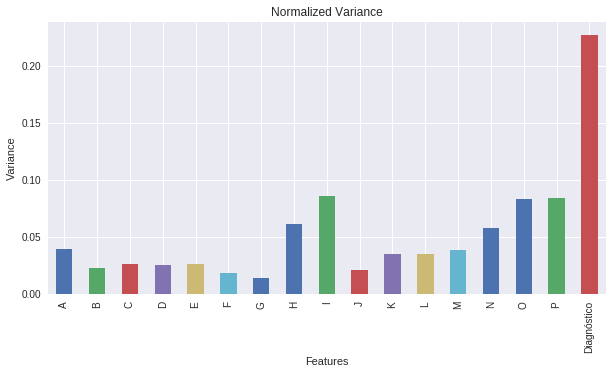

In [31]:
# Plotting the variance of all normalized values of each column.
fig, ax = plt.subplots(figsize=(10, 5))
ax = diabetes_normalized.var().plot.bar()
ax.set_title('Normalized Variance')
ax.set_ylabel('Variance')
ax.set_xlabel('Features')
plt.show()

In [34]:
# Selecting only the hightest variance variables.
diabetes_best_variance = diabetes_normalized[['H', 
                                              'I', 
                                              'N', 
                                              'O', 
                                              'P', 
                                              'Diagnóstico']]
diabetes_best_variance.head()

,H,I,N,O,P,Diagnóstico
0,0.279545,0.271739,0.287157,0.010870,0.201098,1.0
1,0.204545,0.239130,0.182084,0.793478,0.615465,0.0
2,0.162500,0.108696,0.188779,0.989130,0.473286,1.0
3,0.886364,0.891304,0.844869,0.467391,0.209112,0.0
4,0.965909,0.967391,0.946912,0.065217,0.211042,1.0


In [35]:
# Buscar Correlações entre as colunas pertos de 0.
""" Se uma coluna tem uma correlação muito próximo a 1 com outra, é provavel que 
     uma possa ser gerada a partir de outra e/ou carregar as duas em um modelo de 
     aprendizado será redundante. """

columns_correlation = diabetes_best_variance.corr()
columns_correlation

,H,I,N,O,P,Diagnóstico
H,1.000000,0.957319,0.997233,-0.064269,-0.060554,0.055420
I,0.957319,1.000000,0.953729,-0.053882,-0.021995,0.022973
N,0.997233,0.953729,1.000000,-0.064068,-0.059234,0.085393
O,-0.064269,-0.053882,-0.064068,1.000000,0.052659,-0.012306
P,-0.060554,-0.021995,-0.059234,0.052659,1.000000,-0.019141
Diagnóstico,0.055420,0.022973,0.085393,-0.012306,-0.019141,1.000000


Text(0.5, 1.0, 'Correlation Heat Map')

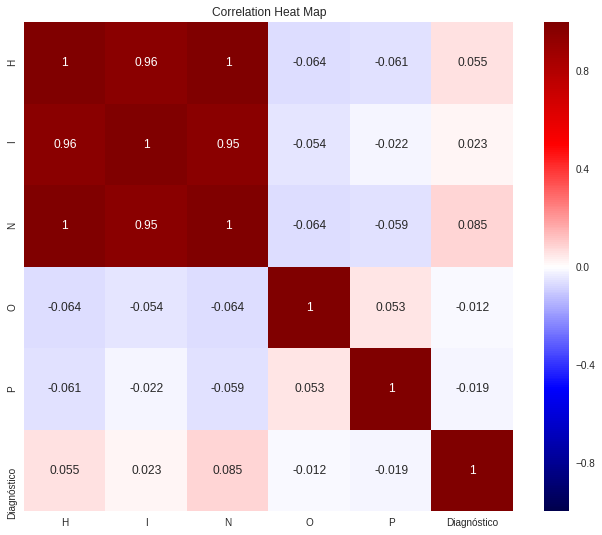

In [126]:
"""
Correlation Map from Seaborn Examples
https://seaborn.pydata.org/examples/many_pairwise_correlations.html

"""
sns.set(style='white')
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(columns_correlation, robust=True, annot=True, cmap='seismic', center=0,
            square=True, linewidths=0)

ax.set_title('Correlation Heat Map')

In [89]:
diabetes_features = diabetes_best_variance[['I', 
                                            'O', 
                                            'P', 
                                            'Diagnóstico']]
diabetes_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 4 columns):
I              768 non-null float64
O              768 non-null float64
P              768 non-null float64
Diagnóstico    768 non-null float64
dtypes: float64(4)
memory usage: 24.3 KB
